# IMPORTING LIBRARIES AND DATASETS

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam
import seaborn as sn
tf.__version__

'2.13.1'

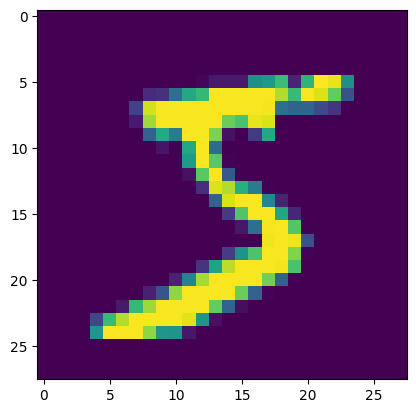

In [2]:
# Importing the MINST dataset from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[0])

In [3]:
print(y_train[:50])     # helps to find out the output layer for the model

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [4]:
# Normalize the data
x_train = x_train/255
x_test = x_test/255

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# FULLY CONNECTED (FC) DENSE LAYER

In [17]:
model_A = tf.keras.Sequential()
model_A.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_A.add(tf.keras.layers.Dense(units= 500, activation= 'relu'))
model_A.add(tf.keras.layers.Dense(units= 500, activation= 'relu'))    # hidden layer
model_A.add(tf.keras.layers.Dense(units= 500, activation= 'relu'))    # hidden layer
model_A.add(tf.keras.layers.Dense(units= 500, activation= 'relu'))    # hidden layer
model_A.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model_A.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy', 'mse'])
model_A.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 500)               392500    
                                                                 
 dense_18 (Dense)            (None, 500)               250500    
                                                                 
 dense_19 (Dense)            (None, 500)               250500    
                                                                 
 dense_20 (Dense)            (None, 500)               250500    
                                                                 
 dense_21 (Dense)            (None, 10)                5010      
                                                                 
Total params: 1149010 (4.38 MB)
Trainable params: 1149

In [18]:
model_A_training = model_A.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2141 - accuracy: 0.9366 - mse: 27.3852 - val_loss: 0.1119 - val_accuracy: 0.9689 - val_mse: 27.3345
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1054 - accuracy: 0.9702 - mse: 27.3901 - val_loss: 0.0973 - val_accuracy: 0.9703 - val_mse: 27.3365
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0764 - accuracy: 0.9781 - mse: 27.3914 - val_loss: 0.1087 - val_accuracy: 0.9718 - val_mse: 27.3363
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0621 - accuracy: 0.9821 - mse: 27.3919 - val_loss: 0.0946 - val_accuracy: 0.9773 - val_mse: 27.3382
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0488 - accuracy: 0.9863 - mse: 27.3926 - val_loss: 0.0966 - val_accuracy: 0.9775 - val_mse: 27.3384
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0449 - accuracy: 0.9

In [19]:
loss_value, accuracy_value, mse_value = model_A.evaluate(x_test, y_test)
print(f"Loss function value = {loss_value}\nAccuracy of the model = {accuracy_value}\nMSE value for the model = {mse_value}")

313/313 [==============================] - 2s 6ms/step - loss: 0.1057 - accuracy: 0.9794 - mse: 27.3387
Loss function value = 0.10570584982633591
Accuracy of the model = 0.9793999791145325
MSE value for the model = 27.33868408203125


313/313 [==============================] - 2s 5ms/step


Text(0.5, 1.0, 'Confusion Matrix Table')

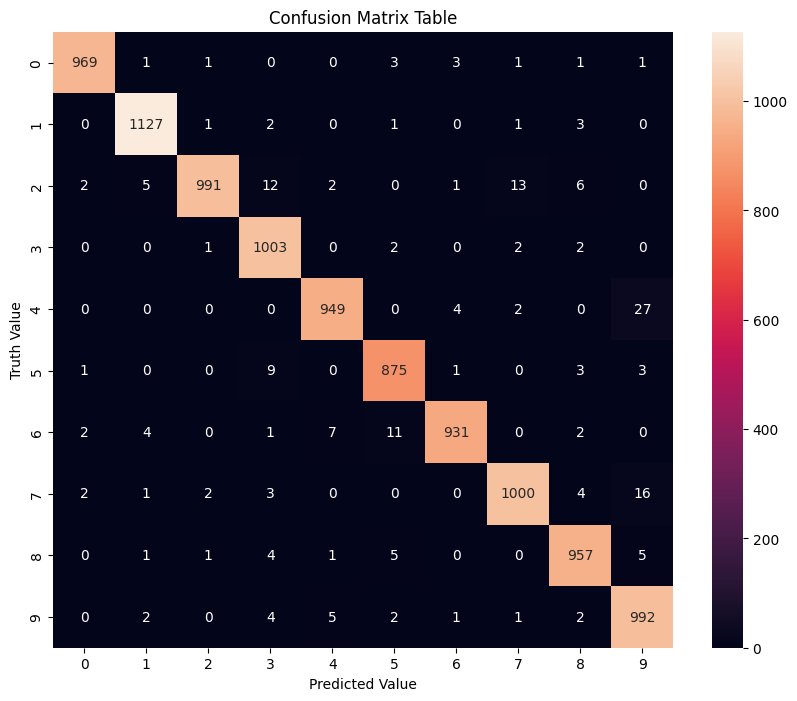

In [20]:
# Predictions
A_prediction = model_A.predict(x_test)
# A_prediction[0]
fc_pred = [np.argmax(i) for i in A_prediction]
cm = tf.math.confusion_matrix(y_test, fc_pred)
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
plt.title("Confusion Matrix Table")

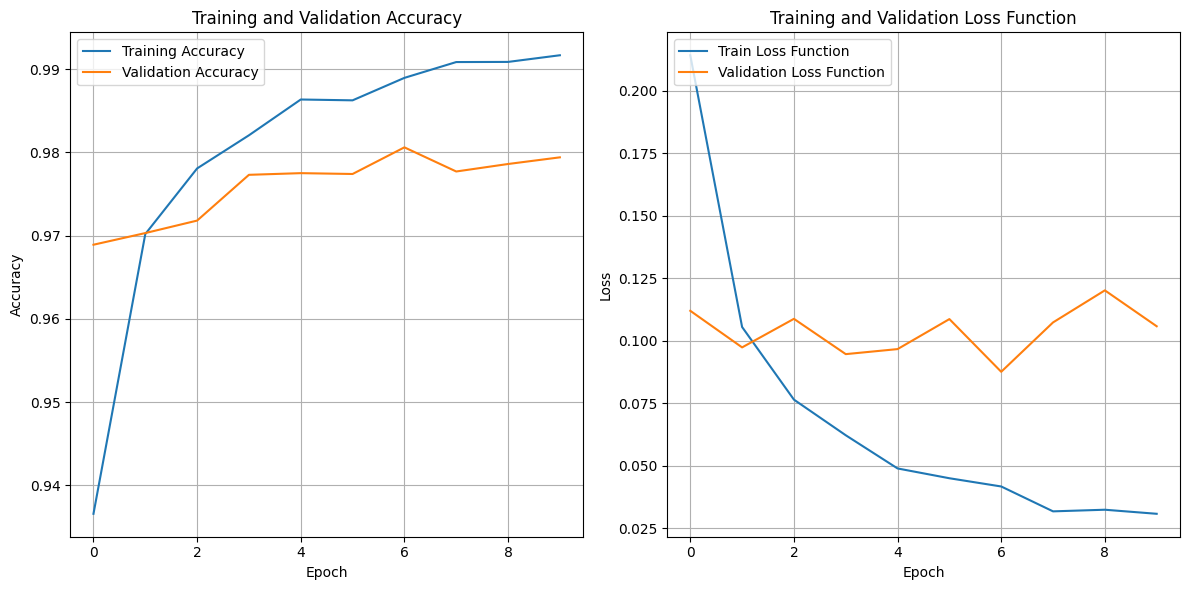

In [21]:
# PLotting of the training and testing curves
history = model_A_training

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(['Train Loss Function', 'Validation Loss Function'], loc='upper left')

plt.tight_layout()
plt.show()